# King County House Sales

# 1. Introduction
## Business Understanding

## Problem Statement
The business problem is the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes. We will use multiple linear regression to predict the edstimated value of homes in King County. By analyzing various features such as bedrooms, bathrooms, square footage etc, we aim to provide homeowners with valuable insights on how specific home renovations may impact and value their properties.
## Main Objective
The main objective of this project is to develop a multiple linear regession model that accurately predicts the estimated value of homes in King County. By analyzing the relationships between various features and sale prices, the model will provide insights on how specific home renovations impact the estimated value. The ultimate aim is to empower homeowners with actionable recommendations, enebling them to make informed decisions about home renovation that have th potential to increase the value of their homes.
## Defining the metrics for success
The project would be considered a success if:
- The predictive model achieves an R-Squared value of at least 80%. This indicates that the model can explain a significant portion of the variation in the estimated home values based on the selected feature.
- The Mean Absolute Percentage Error (MAPE) of the model is less than or equal to 10%. MAPE measures the average percentage difference between the predicted and actual values. A MAPE of 10% or lower indicates that on average, the model's predictions deviate by no more than 10% from the actual values.

## Experimental Design
1. Data Collection. Here we will describe how the King County Sales dataset was obtained and any data preprocessing steps that were performed such as handling missing values, data cleaning and feature selection.
2. Exploratory Data Analysis. Here we will summarize the initial exploration and visualization of the dataset to gain insights intothe distribution of variables, identify any outliers and understand the relationships between features and the target variable.
3. Feature Engineering. Here we will detail the steps taken to transform or engineer the features, such as scling, creating interactio terms, or encoding categorical variables. Explain the rationale behid these transformations and how they contribute to improving the regression model.
4. Model Building. Here we will outline the process of building the multiple linear regression model by selecting the relevant features, splitting the data into training and testing sets, fitting the model to the training data, and evaluating the model's performance using appropriate validation techniques.
5. Model Evaluation. Here we will present the evaluation metrics used to assess the model's performance, such as R-Squared, RMSE, MAE and MAPE. Discuss the model's performance against the predefined success metrics and analyze the strengths and limitations of the model.
6. Model Improvement. Here we will descibe any iteration or improvements made to the initial model based on the evaluation results. This may involve feature selection, feature engineering, regularization techniques, or trying alternative regression models to enhance the models performance.
7. Interpretaion of Coefficients. Here we will discuss the interpretation of the regression coefficients and their significance in relation to the target variable. Explain how these coefficients provide insights into the impact of different features on the estimated home value.
8. Conclusion. Here we will summarize the findings from the analysis, including the final regression model's performance, the key factors influencing home value, and any actionable recommendations for homeowners based on the model's insights.

## Data Understanding
The data that was  used in this project was collectedfrom the following websites:
- 


# 2. Data Collection

In [18]:
# importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
# Loading the data
house = pd.read_csv("kc_house_data.csv")
house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [20]:
# checking the data types of the data
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [3]:
# checking the info of the data
house.info()

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [21]:
# checking the description of the data
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
# checking for duplicates in the id column
house['id'].duplicated().sum()

177

In [23]:
# dropping the duplicates from id column
house = house.drop_duplicates(subset = 'id', keep = 'first')

In [24]:
# ignoring a list of features irrelevant to our analysis
droped_features = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
house_features = house.drop(droped_features, axis = 1)

In [25]:
house_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   19067 non-null  object 
 8   condition    21420 non-null  object 
 9   grade        21420 non-null  object 
 10  yr_built     21420 non-null  int64  
 11  zipcode      21420 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 2.1+ MB


In [26]:
# Replacing missing values on the waterfront property
house['waterfront'] = house['waterfront'].fillna('NO')

# 5. Data Preparation

In [ ]:
# checking for outliers using boxplots

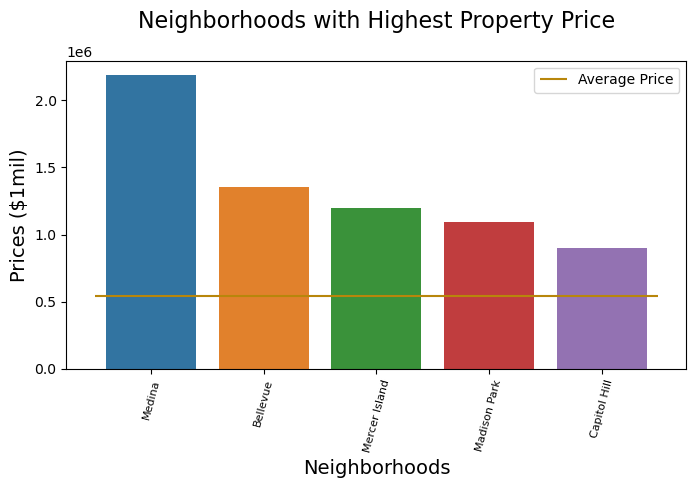

In [17]:
#property values by zipcode calculation
house_price_zip = house.groupby("zipcode")["price"].mean().sort_values(ascending = False)[:5]
house_mean_price = house.price.mean()
#top5 neighborhood label for plot
area_labels = ["Medina", "Bellevue", "Mercer Island", "Madison Park", "Capitol Hill"]

#plotting the data
plt.subplots(figsize=(8,4))
sns.barplot(x=house_price_zip.index, y=house_price_zip, order=house_price_zip.index)
plt.xticks(np.arange(5), area_labels, rotation=75, size=8)
plt.hlines(house_mean_price, -.5 ,4.5, colors="darkgoldenrod", label="Average Price")

plt.xlabel("Neighborhoods", size=14)
plt.ylabel("Prices ($1mil)", size=14)
plt.title("Neighborhoods with Highest Property Price", size=16, y=1.08)
plt.legend()

plt.show();

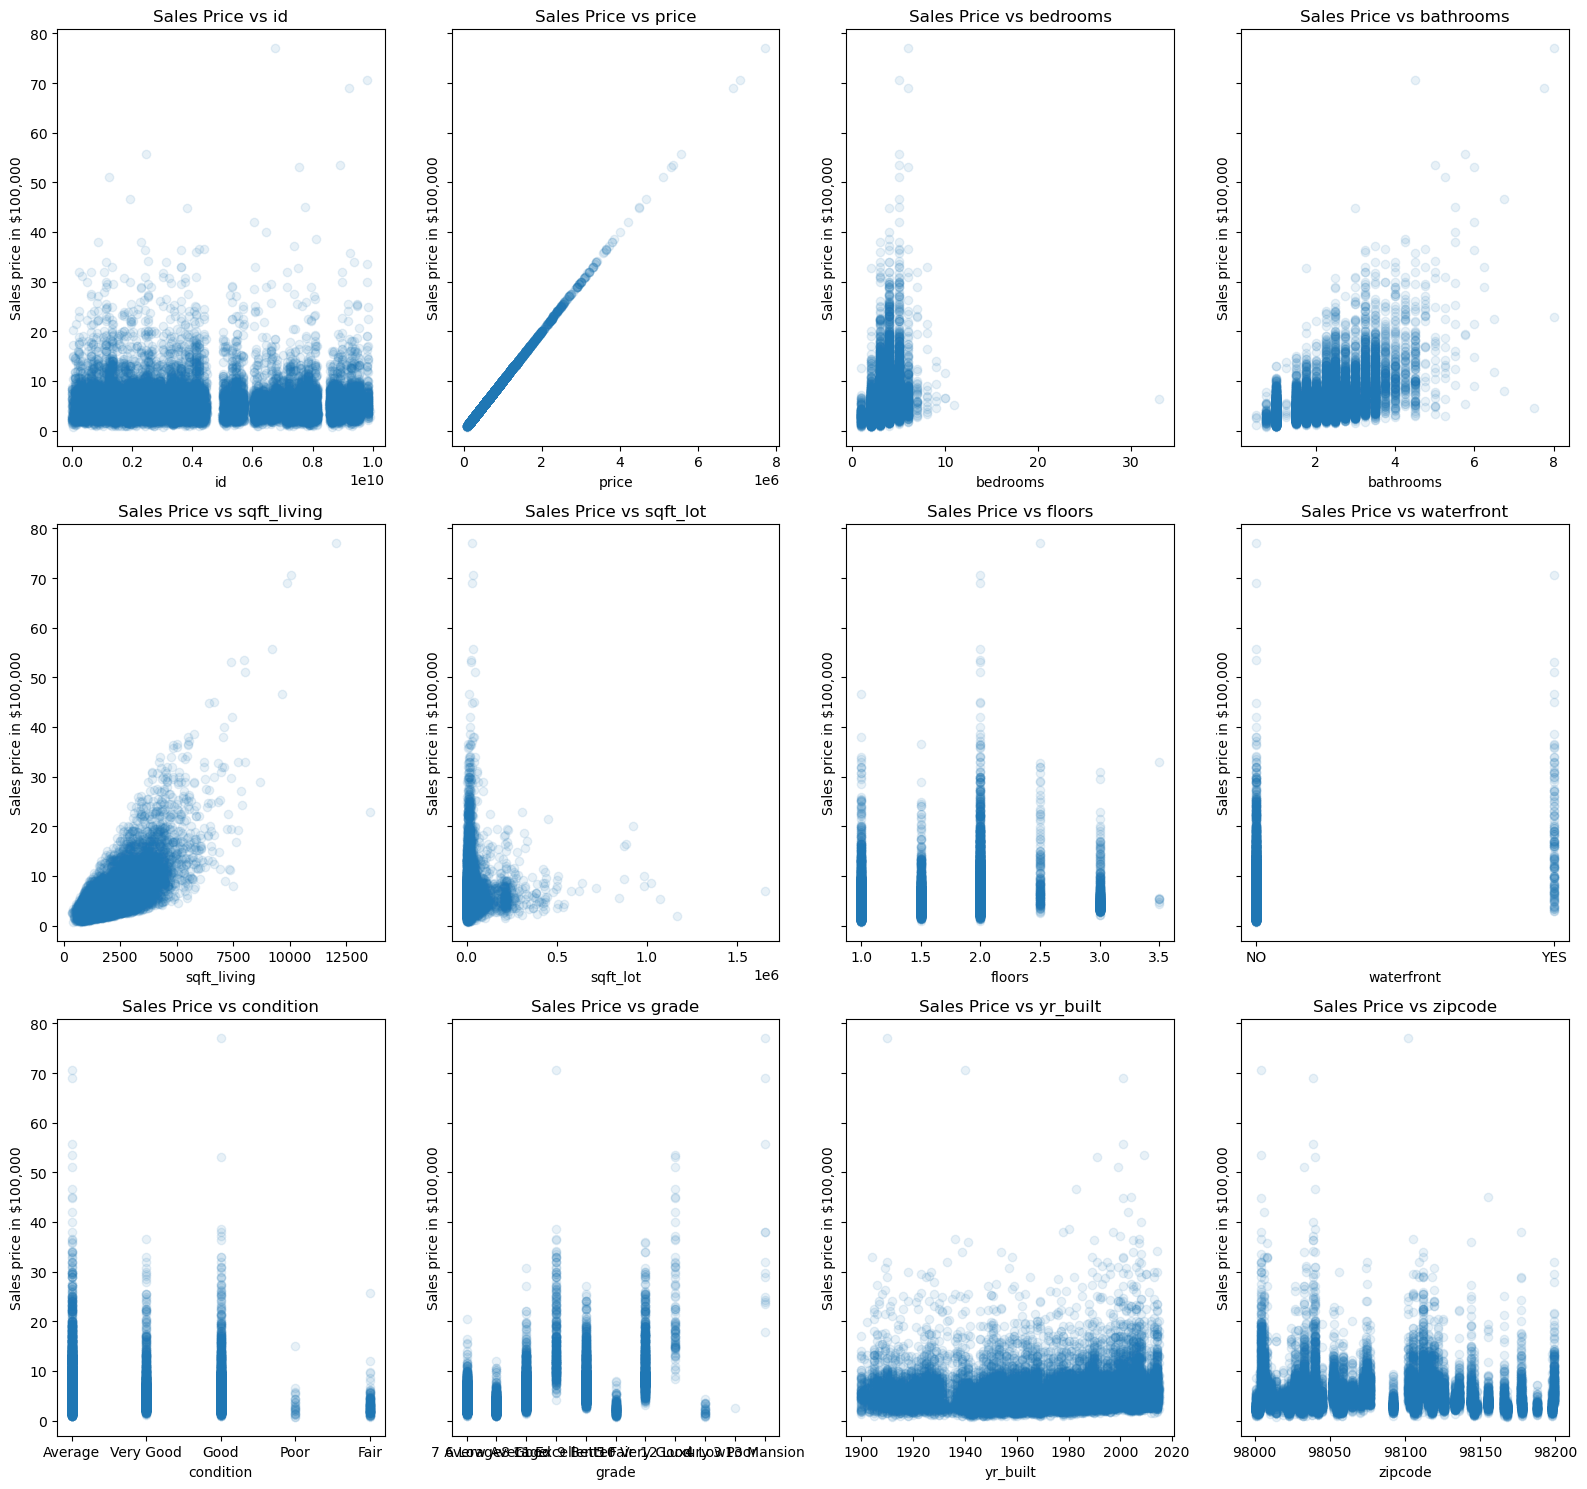

In [14]:
# checking the linearity assumptions with the target variable of price
fig, axes = plt.subplots(nrows = 3, ncols= 4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), house.columns):
    ax.scatter(house[column], house['price']/100_000, label = column, alpha= .1)
    ax.set_title(f'Sales Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sales price in $100,000')
    
fig.tight_layout()